This is a notebook explaining how to construct a basic Convolutional Neural Network that is able to classify images and accomplish much more tasks besides image classification. More complex networks are modelled after this, hence feel free to play around with all published architectures.

To start off, we import layers and models from keras, a high level API that provideds an interface for Tensorflow to utilize the underlying artificial neural networks in Python

In [ ]:
from keras import layers
from keras import models

How a Convolutional Neural Network is constructed?

- Convolutional layer
- Non-linearity
- Pooling / Downsampling
- Fully connected layer


** Read the end of this notebook to see how we can tweak these parameters in a neural network

The Sequential() constructor creates a plain stack of layers with only one input tensor and one output tensor - say, we input one image and expect a category.

In [ ]:
model = models.Sequential()

We can add a layer of convolution to start learning the features. Here, passing in 32 shows that we are learning 32 features, each with a kernel size of (3, 3). The activation function chosen here is 'relu', which stands for Rectified Linear Unit. ReLU is chosen as it yields better results than other activation functions like sigmoid or hyperbolic tangent. Finally, we pass in the input shape of our image.

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

Usually, after each convolutional layer, we add a MaxPooling2D layer to downsample the image in order to preserve spatial data and at the same time, generalize the learning behaviour. This takes in a window size of(2, 2) here, where the maximum value in each window is taken.

In [ ]:
model.add(layers.MaxPooling2D(2, 2))

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

We can view the whole model using summary(). The summary gives us the number of parameters that it needs to train with every layer, and the shape of the output tensor after each layer.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Finally, we would flatten the layers to serialize a multidimensional tensor, meaning the tensor is reshaped to have the same shape that is equal to the number of elements in a tensor

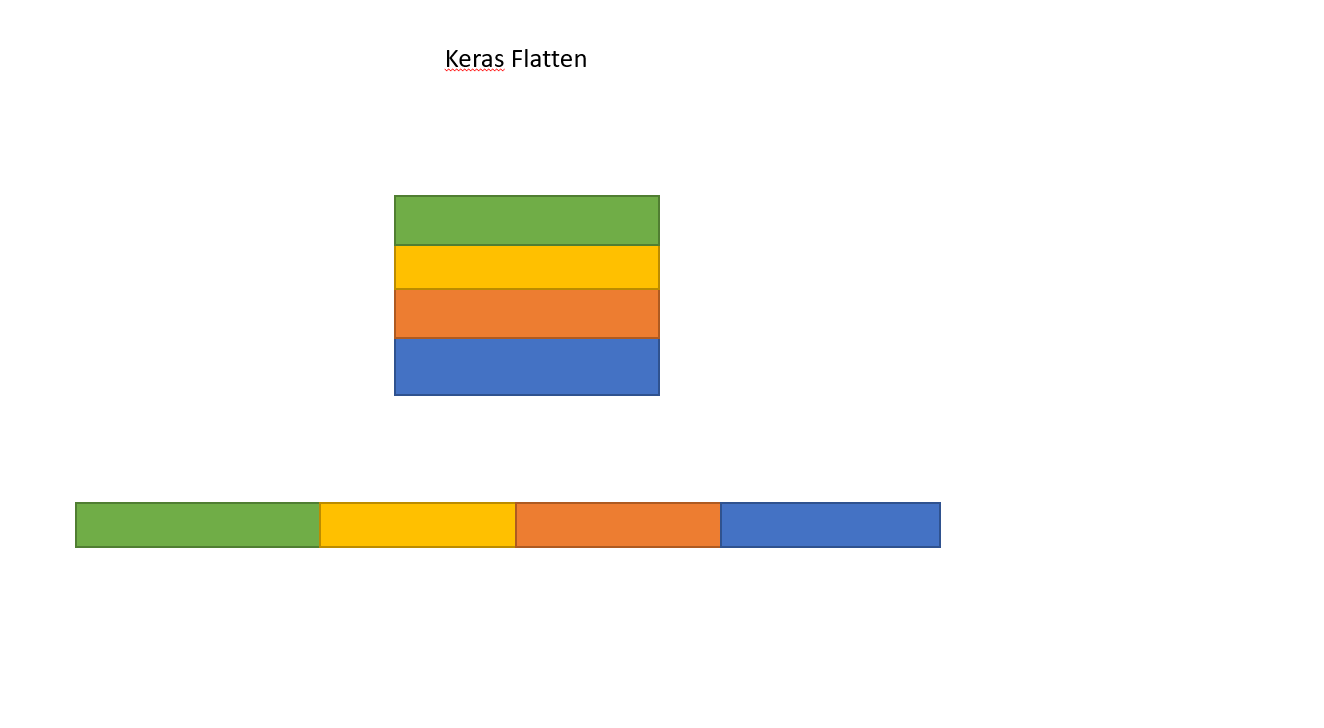

Before we are able to finish up with the model, we add a Dense layer so that we can connect all the layers together, which we call it a densely/fully connected layer. This layer is just a regular layer of neurons taking in as input the neurons in the previous layer and has an activation function *(activation(dot(input, kernel) + bias)* to produce an output tensor of the shape defined in the first argument - basically *(batch_size, units)*, here 10 and 64 units. The last layer can be seen as an output tensor of shape *(None, 10)* so that we can detect 10 different classes of images.

In [ ]:
# Flatten
# Fully connected layer

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)               

Now that we have the model setup, we are moving to feeding the model input data to train it. By using the MNIST data which is a dataset comprising all 10 digits handwritten which had been correctly identified and labelled, we prepare the data before feeding it to the model.

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Clearly, we can see that the datatset has 70,000 images of handwritten digits, with 60,000 in our training set and the remaining 10,000 in our test set. All of which having a size of 28 pixels by 28 pixels

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


One crucial step is to expand the dimensions of our images. The reason for this is because our convolutional neural network takes in as input matrices of size *(batch_size, dim1, dim2, input_channel)*. Hence we are merely adding the extra dimension with essentially the same data as our input.

After which, we normalize our images. This is another crucial step for data normalization to ensure that the data distribution for each input parameter(here called pixels) is similar.

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
print(train_images.shape)

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
print(train_images[0].shape)
print(test_images[0].shape)

(28, 28, 1)
(28, 28, 1)


Because our images can be classified into 10 different categories, and that the categories are distinct, we need to convert the integers to binary class matrix, in other words a vector with shape that the model can output.

In [ ]:
print(train_labels[0])
print(test_labels[0])

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[0])
print(test_labels[0])

5
7
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


One last step before we start training the model by feeding training images is to compile the model. This is to tell the model what kind of loss function and optimzer we are using. The loss function here is categorical_crossentropy, as this is a classification of multi-category case. While the optimizer used here is RMSprop, a gradient descent algorithm proposed by Geoff Hinton that helps the model learn by a defined learning rate.

In [ ]:
# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 49s 52ms/step - loss: 0.1736 - accuracy: 0.9460
Epoch 2/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0473 - accuracy: 0.9852
Epoch 3/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0327 - accuracy: 0.9896
Epoch 4/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0243 - accuracy: 0.9926
Epoch 5/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0205 - accuracy: 0.9936
Epoch 6/10
938/938 [==============================] - 49s 52ms/step - loss: 0.0159 - accuracy: 0.9953
Epoch 7/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 8/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0105 - accuracy: 0.9966
Epoch 9/10
938/938 [==============================] - 48s 52ms/step - loss: 0.0088 - accuracy: 0.9972
Epoch 10/10
938/938 [==============================] - 49s 52ms/step - loss: 0.008

Finally, a simple evaluation can tell how accurate our model is, together with the loss. However, much more work needs to be done if the use case of the CNN model is different.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_loss)
print(test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0449 - accuracy: 0.9902
0.04492592439055443
0.9901999831199646


# Parameters to Keras Conv2D Class



---



**Filters**

- The number of filters the convolutional layer will learn

The layers early in the network will learn fewer filters compared to the layers deeper in the network, hence the larger the network, the more filters the network has to learn.

- The number of filters *usually* go with powers of 2, starting with 32, then go up to 64 and 128 on the fewer side, and it can go up to 1024 for larger networks. Keep in mind that the more filters your network has to learn, the more expensive your network is.

---



**Kernel size**

- The size of the 2D convolution window, usually width and height of odd numbers

This is a tuple specifying the width and height of the convolution window where our filters are learned.

- This is usually decided upon the size of your images. If the image size is larger than 128 x 128, the filter size can be 5x5 or 7x7 in order to learn the features more quickly, and then for deeper layers, a filter size of 3x3 is usually sufficient. 
- It might be a good idea to stick with kernel sizes of 1x1 and 3x3 if the image size is smaller than 128 x 128, in order to learn the necessary features.

---



**Strides**

- tuple of 2 integers, specifying the step of the convolution window along the x and y axis.

The stride here is how we move our kernel size along the x and y axis of our input image when learning filters. In other words, we are scanning the convolution window of kernel size along the x and y axis of the input image. The stride refers to how many units to the left/right and up/down we shift the window.

- Usually, the stride here replaces the use of maxpooling, which is a method to reduce spatial dimensions for generalization.

---



**Padding**

- valid or same

Valid:

The input is not zero-padded and the spatial dimensions are allowed to be reduced through the convolution operation.

Same:

The spatial dimensions of the input are preserved such that the output volume size matches the input volume size.


You could set this flag to same, and then reduce the spatial dimension either by applying maxpooling or striding.

---



**Activation**

- The activation function to perform after the convolution operation.
- Usually 'relu', 'softmax' or 'sigmoid'.
- Best to use this parameter as this helps keep your code clean with the activation function specified within the convolutional layer itself.

---



**use_bias**

- whether a bias vector is added to the convolutional layer
- Best to use this parameter as adding a bias will usually add a little more flexibility to the model.

---



*These are just the few of the many parameters in the Conv2D class and you can check out the Keras documentation to learn more about each parameter and how each one would affect the model, because ultimately, it is these parameters we are tweaking that will bring the best results from the model.*
